# Лабораторная работа №2. Фильтрация изображений

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Часть 1:

**Задание 1:** Учитывая следующее изображение I

[![image.png](https://i.postimg.cc/kXtDn958/image.png)](https://postimg.cc/7fwqVF0Y)

И следующее ядро K:

[![image.png](https://i.postimg.cc/kgmSzDyD/image.png)](https://postimg.cc/crF68x2N)

- Отфильтруйте изображение I, используя ядро K и технику заполнения 0.
- Отфильтруйте изображение I, используя медианный фильтр размером 3x3 и технику заполнения нулями.
- Визуализируйте полученный результат.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

I = np.array([
    [23, 12, 34, 22],
    [89, 35, 25, 78],
    [67, 34, 21, 98],
    [57, 76, 36, 54]
])


K = np.array([
    [23, 12, 34],
    [89, 35, 25],
    [67, 34, 21]
]) / 37

print("Исходное изображение I:")
print(I)
print("\nЯдро K (нормализованное):")
print(K)

Исходное изображение I:
[[23 12 34 22]
 [89 35 25 78]
 [67 34 21 98]
 [57 76 36 54]]

Ядро K (нормализованное):
[[0.62162162 0.32432432 0.91891892]
 [2.40540541 0.94594595 0.67567568]
 [1.81081081 0.91891892 0.56756757]]


In [ ]:
def convolve_zero_padding(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh//2, kw//2

    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    result = np.zeros_like(image, dtype=float)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            result[i, j] = np.sum(region * kernel)

    return result

def median_filter_zero_padding(image, size=3):
    h, w = image.shape
    pad = size//2

    padded = np.pad(image, ((pad, pad), (pad, pad)), mode='constant')
    result = np.zeros_like(image)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+size, j:j+size]
            result[i, j] = np.median(region)

    return result


Результат свертки:
[[131 297 206 219]
 [207 477 335 290]
 [242 490 470 298]
 [158 305 371 182]]

Результат медианной фильтрации:
[[ 0 23 22  0]
 [23 34 34 22]
 [35 36 36 25]
 [ 0 34 34  0]]


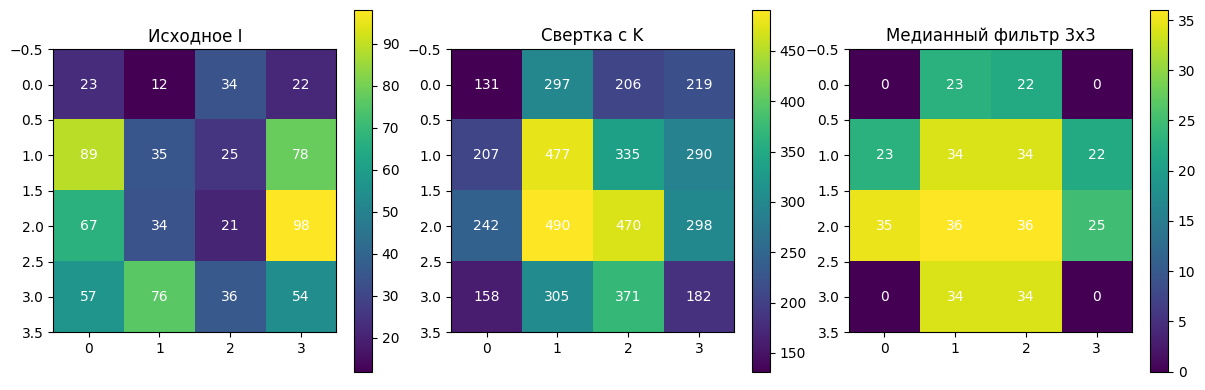

In [ ]:
I_conv = convolve_zero_padding(I, K)
I_median = median_filter_zero_padding(I, 3)

print("\nРезультат свертки:")
print(I_conv.astype(int))
print("\nРезультат медианной фильтрации:")
print(I_median)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(I, cmap='viridis')
plt.title('Исходное I')
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        plt.text(j, i, I[i, j], ha='center', va='center', color='white')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(I_conv, cmap='viridis')
plt.title('Свертка с K')
for i in range(I_conv.shape[0]):
    for j in range(I_conv.shape[1]):
        plt.text(j, i, int(I_conv[i, j]), ha='center', va='center', color='white')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(I_median, cmap='viridis')
plt.title('Медианный фильтр 3x3')
for i in range(I_median.shape[0]):
    for j in range(I_median.shape[1]):
        plt.text(j, i, I_median[i, j], ha='center', va='center', color='white')
plt.colorbar()

plt.tight_layout()
plt.show()

**Задание 2:** Учитывая следующее изображение J:

![image.png](https://i.imgur.com/bL8xXHS.png)

- Сгладьте изображение J с использованием усредняющего фильтра размером 3x3 и метода заполнения нулями.
- Увеличьте резкость изображения J, используя фильтр Лапласа размером 3x3 и технику заполнения нулями.
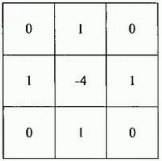
- Увеличьте резкость изображения J, используя фильтр Собеля размером 3x3 и технику заполнения нулями.
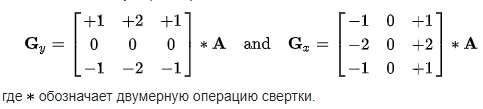

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


J = np.array([
    [123, 127, 128, 119, 115, 130],
    [140, 145, 148, 153, 167, 172],
    [133, 154, 183, 192, 194, 191],
    [194, 199, 207, 210, 198, 195],
    [164, 170, 175, 162, 173, 151]
])

print("Исходное изображение J:")
print(J)

Исходное изображение J:
[[123 127 128 119 115 130]
 [140 145 148 153 167 172]
 [133 154 183 192 194 191]
 [194 199 207 210 198 195]
 [164 170 175 162 173 151]]


In [ ]:
def convolve_zero_padding(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh//2, kw//2

    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    result = np.zeros_like(image, dtype=float)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            result[i, j] = np.sum(region * kernel)

    return result

In [ ]:
avg_kernel = np.ones((3, 3)) / 9
J_smooth = convolve_zero_padding(J, avg_kernel)

laplace_kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])
J_laplace = J - convolve_zero_padding(J, laplace_kernel)

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

grad_x = convolve_zero_padding(J, sobel_x)
grad_y = convolve_zero_padding(J, sobel_y)
J_sobel = np.sqrt(grad_x**2 + grad_y**2)

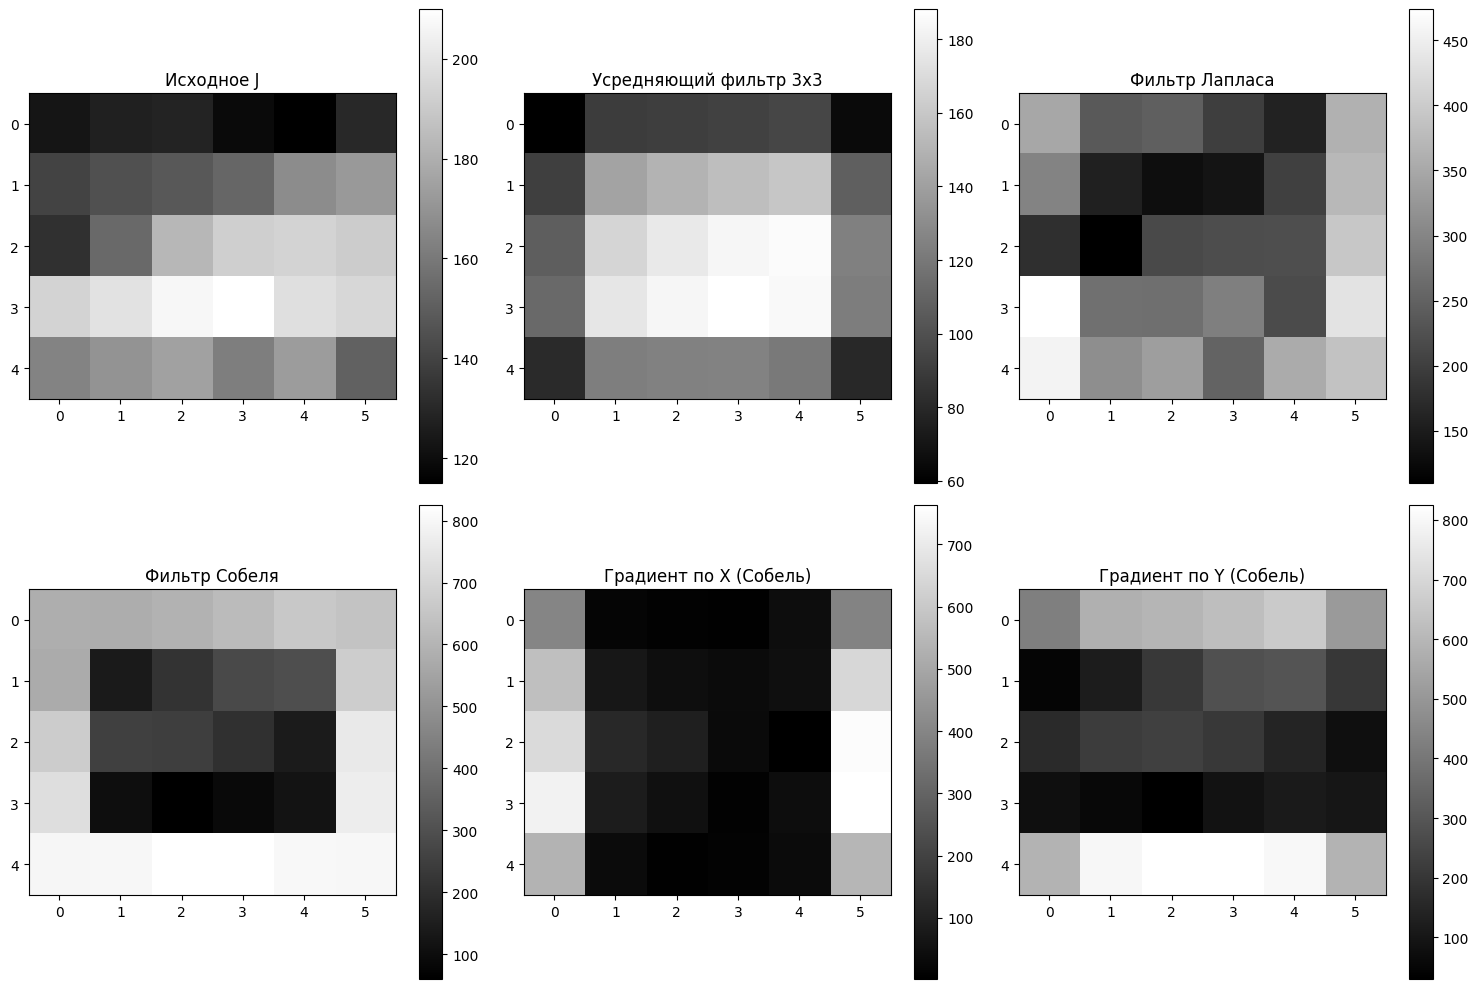


Результат сглаживания (первые 4x4):
[[ 59  90  91  92]
 [ 91 142 149 155]
 [107 167 176 183]
 [112 175 183 188]]

Результат Лапласа (первые 4x4):
[[348 239 246 199]
 [299 156 131 139]
 [177 110 214 220]
 [474 270 268 291]]


In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(J, cmap='gray')
plt.title('Исходное J')
plt.colorbar()

plt.subplot(2, 3, 2)
plt.imshow(J_smooth, cmap='gray')
plt.title('Усредняющий фильтр 3x3')
plt.colorbar()

plt.subplot(2, 3, 3)
plt.imshow(J_laplace, cmap='gray')
plt.title('Фильтр Лапласа')
plt.colorbar()

plt.subplot(2, 3, 4)
plt.imshow(J_sobel, cmap='gray')
plt.title('Фильтр Собеля')
plt.colorbar()

plt.subplot(2, 3, 5)
plt.imshow(np.abs(grad_x), cmap='gray')
plt.title('Градиент по X (Собель)')
plt.colorbar()

plt.subplot(2, 3, 6)
plt.imshow(np.abs(grad_y), cmap='gray')
plt.title('Градиент по Y (Собель)')
plt.colorbar()

plt.tight_layout()
plt.show()

print("\nРезультат сглаживания (первые 4x4):")
print(J_smooth[:4, :4].astype(int))
print("\nРезультат Лапласа (первые 4x4):")
print(J_laplace[:4, :4].astype(int))

# Часть 2. Используйте OpenCV и Python для выполнения следующих задач:

- Загрузите из Интернета несколько изображений (N > 2) в оттенках серого для своей работы.

In [ ]:
#Ваш код

**Задание 1.** Загрузите изображение и отобразите его и его гистограмму на экране.

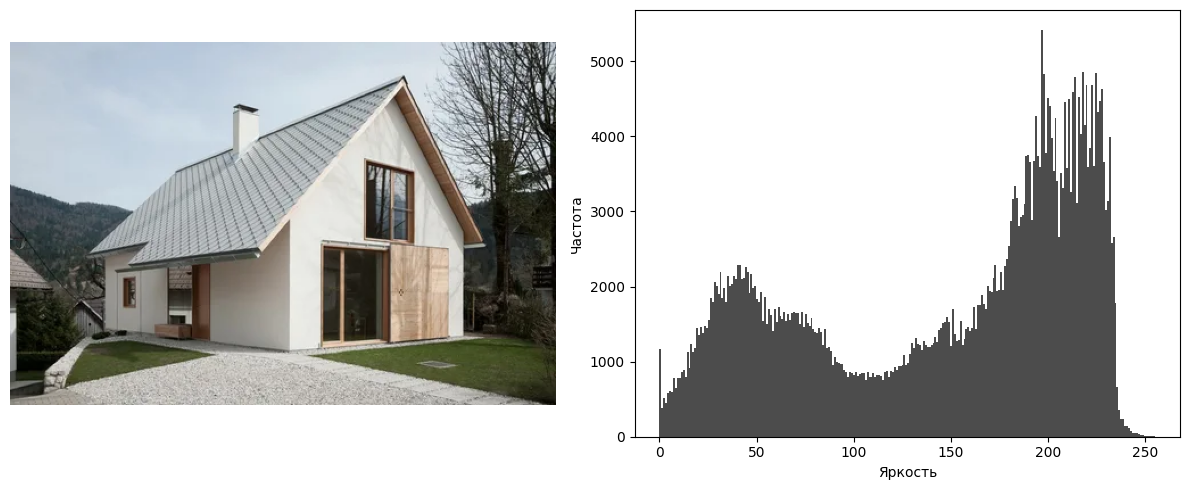

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('house.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(img_rgb.ravel(), bins=256, color='black', alpha=0.7)
plt.xlabel('Яркость')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

**Задание 2:** Примените фильтр усреднения с помощью функции: _cv2.blur()_, фильтр Гаусса с помощью функции _cv2.GaussianBlur()_ и медианный фильтр с помощью функции _cv2.medianBlur()_ к загруженному изображению, чтобы размыть его. Отобразите отфильтрованные изображения и сравните разницу с исходным изображением.

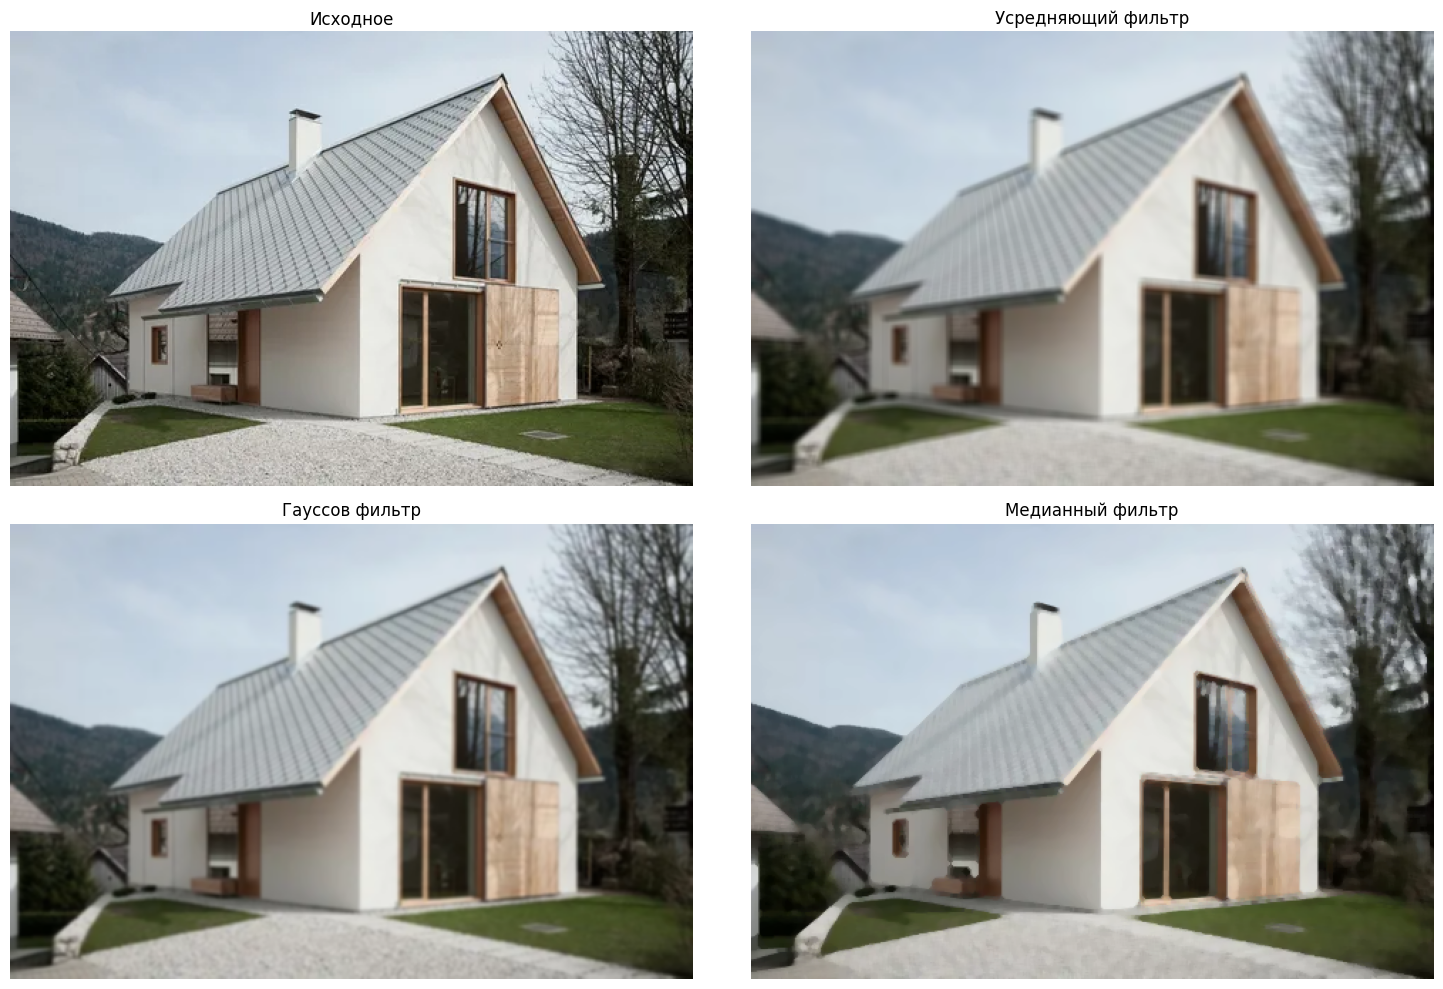

In [ ]:
img_blur = cv2.blur(img_rgb, (5, 5))
img_gaussian = cv2.GaussianBlur(img_rgb, (5, 5), 0)
img_median = cv2.medianBlur(img_rgb, 5)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Исходное')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_blur)
plt.title('Усредняющий фильтр')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_gaussian)
plt.title('Гауссов фильтр')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_median)
plt.title('Медианный фильтр')
plt.axis('off')

plt.tight_layout()
plt.show()


**Задание 3.** Добавьте к загруженному изображению гауссов шум (N ~ (m=0, sigma=3)), шум соли (I = 255) и перца (I = 0) и периодический шум, а затем отобразите зашумленные изображения с соответствующей им гистограммой.

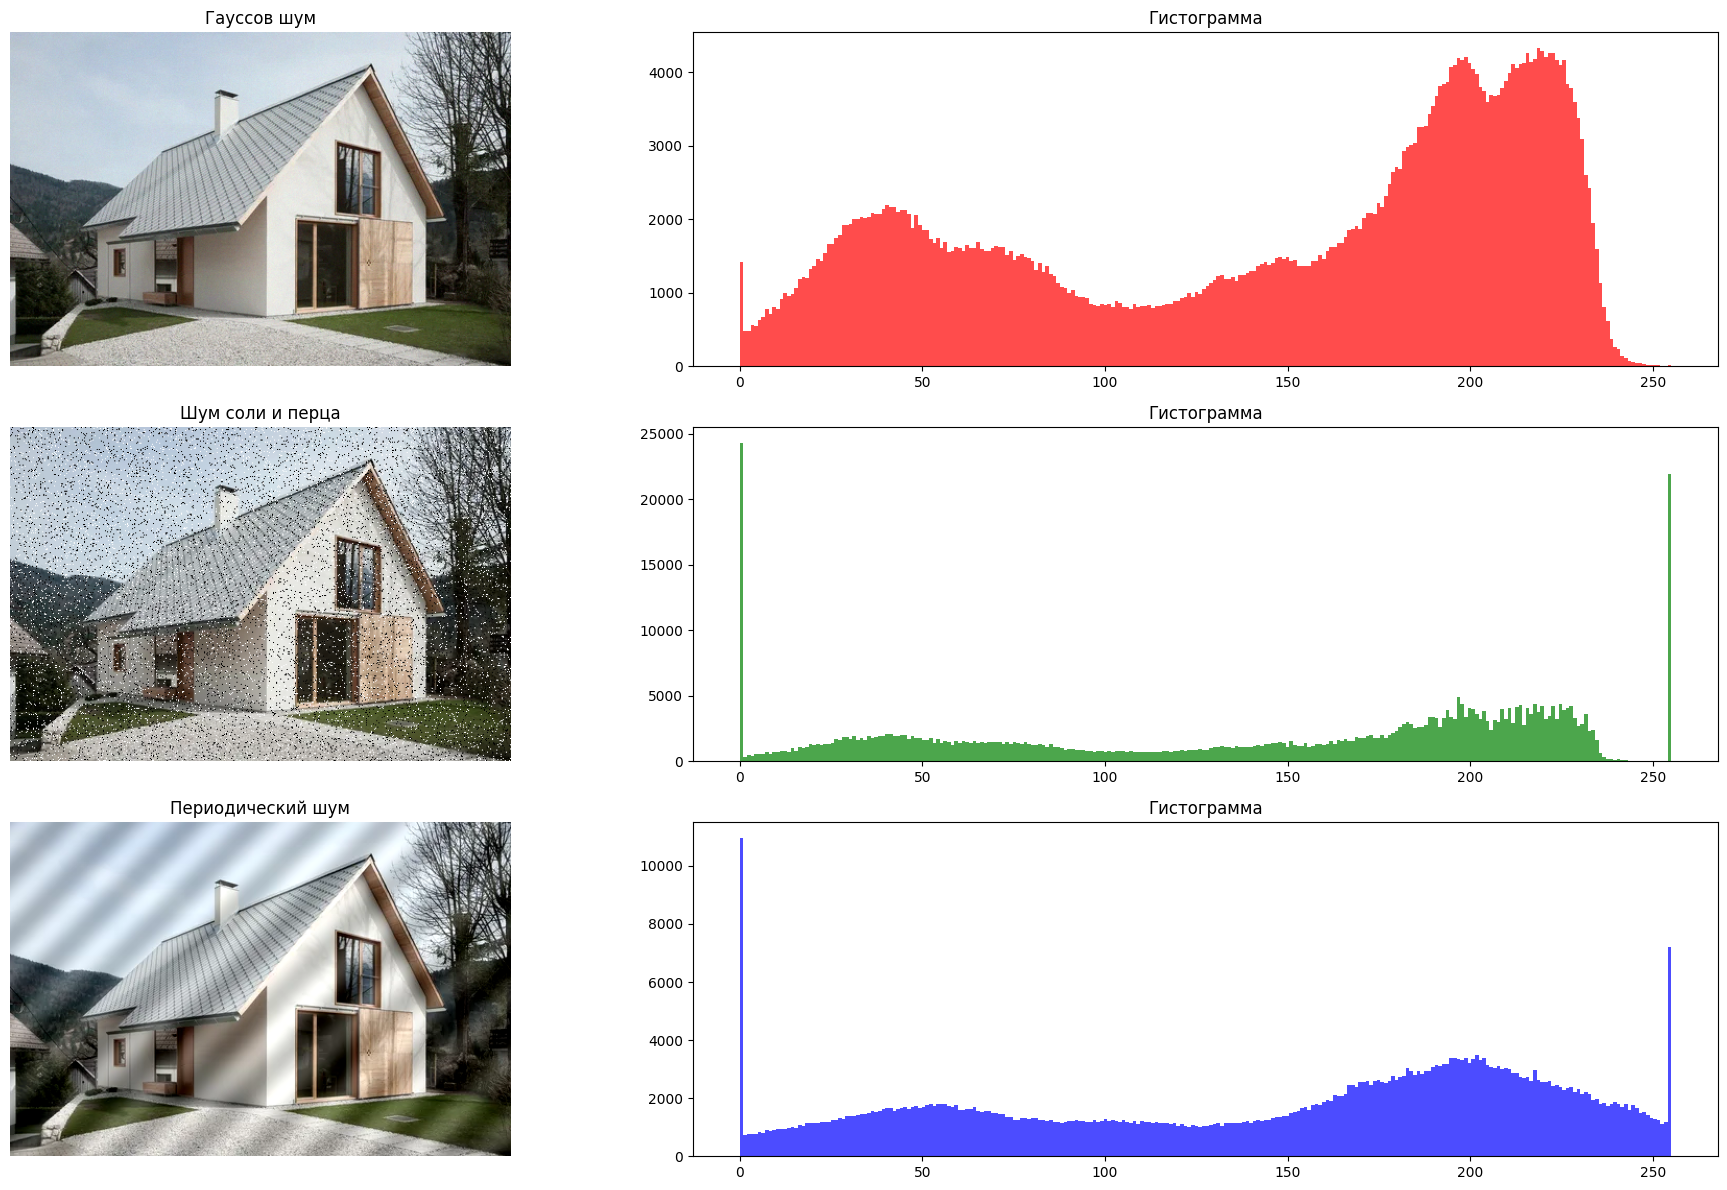

In [ ]:
noise_gaussian = np.random.normal(0, 3, img_rgb.shape).astype(np.float32)
img_gaussian = np.clip(img_rgb.astype(np.float32) + noise_gaussian, 0, 255).astype(np.uint8)

img_salt_pepper = img_rgb.copy()
salt_mask = np.random.random(img_rgb.shape[:2]) < 0.05
pepper_mask = np.random.random(img_rgb.shape[:2]) < 0.05
img_salt_pepper[salt_mask] = 255
img_salt_pepper[pepper_mask] = 0

x, y = np.meshgrid(np.arange(img_rgb.shape[1]), np.arange(img_rgb.shape[0]))
periodic_noise = 30 * np.sin(0.1 * x + 0.1 * y)
img_periodic = np.clip(img_rgb.astype(np.float32) + periodic_noise[:, :, np.newaxis], 0, 255).astype(np.uint8)

plt.figure(figsize=(20, 12))

plt.subplot(3, 2, 1)
plt.imshow(img_gaussian)
plt.title('Гауссов шум')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.hist(img_gaussian.ravel(), bins=256, color='red', alpha=0.7)
plt.title('Гистограмма')

plt.subplot(3, 2, 3)
plt.imshow(img_salt_pepper)
plt.title('Шум соли и перца')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.hist(img_salt_pepper.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Гистограмма')

plt.subplot(3, 2, 5)
plt.imshow(img_periodic)
plt.title('Периодический шум')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.hist(img_periodic.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Гистограмма')

plt.tight_layout()
plt.show()

**Задание 4.** Примените усредняющий фильтр, фильтр Гаусса и медианный фильтр к трем зашумленным изображениям, чтобы удалить шум. Отобразите изображения с шумом и изображения с удалением шума, чтобы увидеть разницу. Посчитайте MSE в зашумленном и отфильтрованном изображениях относительно оригинала.

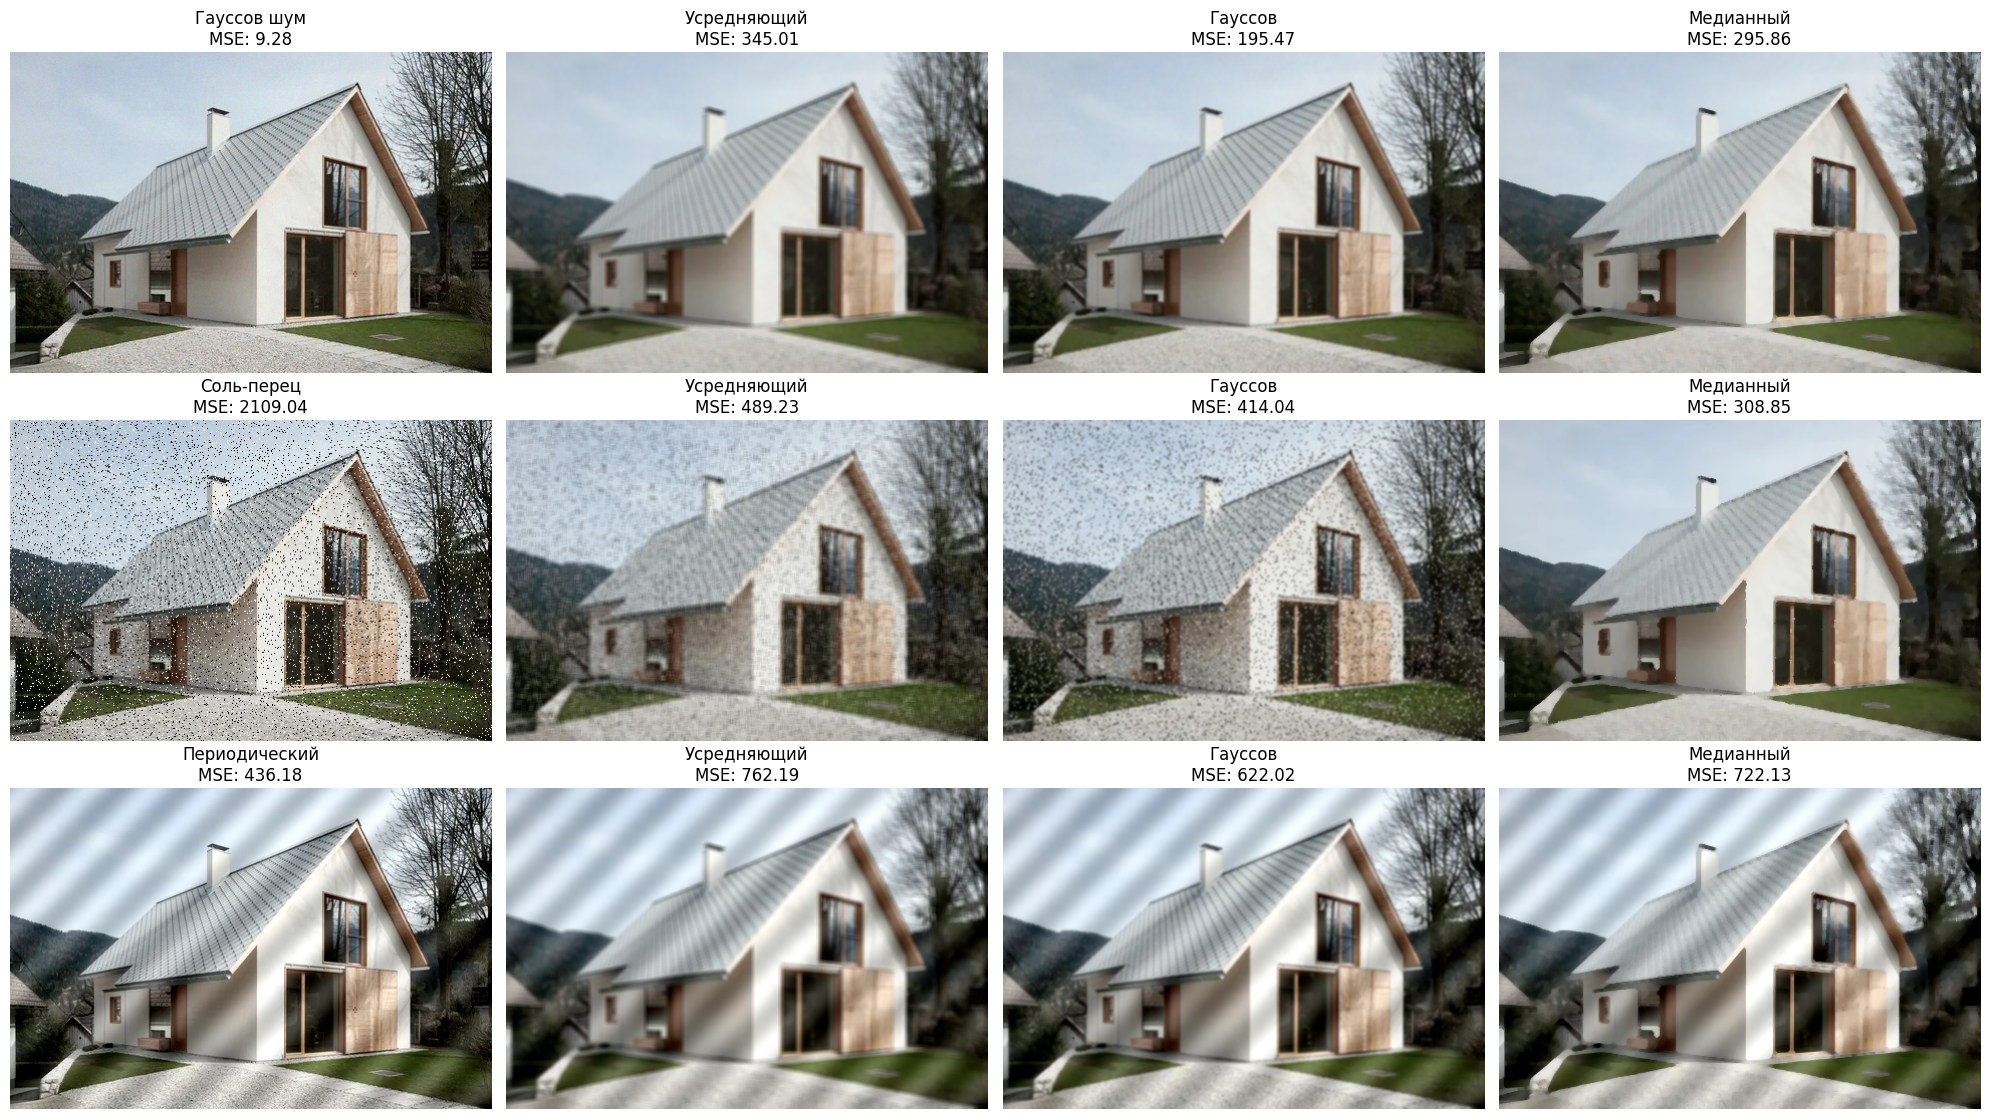

In [ ]:
def mse(original, filtered):
    return np.mean((original.astype(float) - filtered.astype(float)) ** 2)


noise_gaussian = np.random.normal(0, 3, img_rgb.shape).astype(np.float32)
img_gaussian = np.clip(img_rgb.astype(np.float32) + noise_gaussian, 0, 255).astype(np.uint8)

img_salt_pepper = img_rgb.copy()
salt_mask = np.random.random(img_rgb.shape[:2]) < 0.05
pepper_mask = np.random.random(img_rgb.shape[:2]) < 0.05
img_salt_pepper[salt_mask] = 255
img_salt_pepper[pepper_mask] = 0

x, y = np.meshgrid(np.arange(img_rgb.shape[1]), np.arange(img_rgb.shape[0]))
periodic_noise = 30 * np.sin(0.1 * x + 0.1 * y)
img_periodic = np.clip(img_rgb.astype(np.float32) + periodic_noise[:, :, np.newaxis], 0, 255).astype(np.uint8)

img_gaussian_avg = cv2.blur(img_gaussian, (5,5))
img_gaussian_gauss = cv2.GaussianBlur(img_gaussian, (5,5), 0)
img_gaussian_median = cv2.medianBlur(img_gaussian, 5)

img_salt_pepper_avg = cv2.blur(img_salt_pepper, (5,5))
img_salt_pepper_gauss = cv2.GaussianBlur(img_salt_pepper, (5,5), 0)
img_salt_pepper_median = cv2.medianBlur(img_salt_pepper, 5)

img_periodic_avg = cv2.blur(img_periodic, (5,5))
img_periodic_gauss = cv2.GaussianBlur(img_periodic, (5,5), 0)
img_periodic_median = cv2.medianBlur(img_periodic, 5)

plt.figure(figsize=(20, 15))

plt.subplot(4, 4, 1)
plt.imshow(img_gaussian)
plt.title(f'Гауссов шум\nMSE: {mse(img_rgb, img_gaussian):.2f}')
plt.axis('off')

plt.subplot(4, 4, 2)
plt.imshow(img_gaussian_avg)
plt.title(f'Усредняющий\nMSE: {mse(img_rgb, img_gaussian_avg):.2f}')
plt.axis('off')

plt.subplot(4, 4, 3)
plt.imshow(img_gaussian_gauss)
plt.title(f'Гауссов\nMSE: {mse(img_rgb, img_gaussian_gauss):.2f}')
plt.axis('off')

plt.subplot(4, 4, 4)
plt.imshow(img_gaussian_median)
plt.title(f'Медианный\nMSE: {mse(img_rgb, img_gaussian_median):.2f}')
plt.axis('off')

plt.subplot(4, 4, 5)
plt.imshow(img_salt_pepper)
plt.title(f'Соль-перец\nMSE: {mse(img_rgb, img_salt_pepper):.2f}')
plt.axis('off')

plt.subplot(4, 4, 6)
plt.imshow(img_salt_pepper_avg)
plt.title(f'Усредняющий\nMSE: {mse(img_rgb, img_salt_pepper_avg):.2f}')
plt.axis('off')

plt.subplot(4, 4, 7)
plt.imshow(img_salt_pepper_gauss)
plt.title(f'Гауссов\nMSE: {mse(img_rgb, img_salt_pepper_gauss):.2f}')
plt.axis('off')

plt.subplot(4, 4, 8)
plt.imshow(img_salt_pepper_median)
plt.title(f'Медианный\nMSE: {mse(img_rgb, img_salt_pepper_median):.2f}')
plt.axis('off')

plt.subplot(4, 4, 9)
plt.imshow(img_periodic)
plt.title(f'Периодический\nMSE: {mse(img_rgb, img_periodic):.2f}')
plt.axis('off')

plt.subplot(4, 4, 10)
plt.imshow(img_periodic_avg)
plt.title(f'Усредняющий\nMSE: {mse(img_rgb, img_periodic_avg):.2f}')
plt.axis('off')

plt.subplot(4, 4, 11)
plt.imshow(img_periodic_gauss)
plt.title(f'Гауссов\nMSE: {mse(img_rgb, img_periodic_gauss):.2f}')
plt.axis('off')

plt.subplot(4, 4, 12)
plt.imshow(img_periodic_median)
plt.title(f'Медианный\nMSE: {mse(img_rgb, img_periodic_median):.2f}')
plt.axis('off')

plt.tight_layout()
plt.show()

**Задание 5.** Преобразуйте периодический зашумленный кадр из пространственной области в частотную область, используя преобразование Фурье (https://numpy.org/doc/stable/reference/routines.fft.html), затем:

(1) Выполните удаление шума на преобразованном изображении с использованием частотной фильтрации.

(2) Выполнените обратное преобразования Фурье для преобразования изображения из частотной области обратно в пространственную область.

(3) Отобразите периодическое зашумленное изображение и отфильтрованное изображение вместе для сравнения.

(4) Посчитайте MSE.

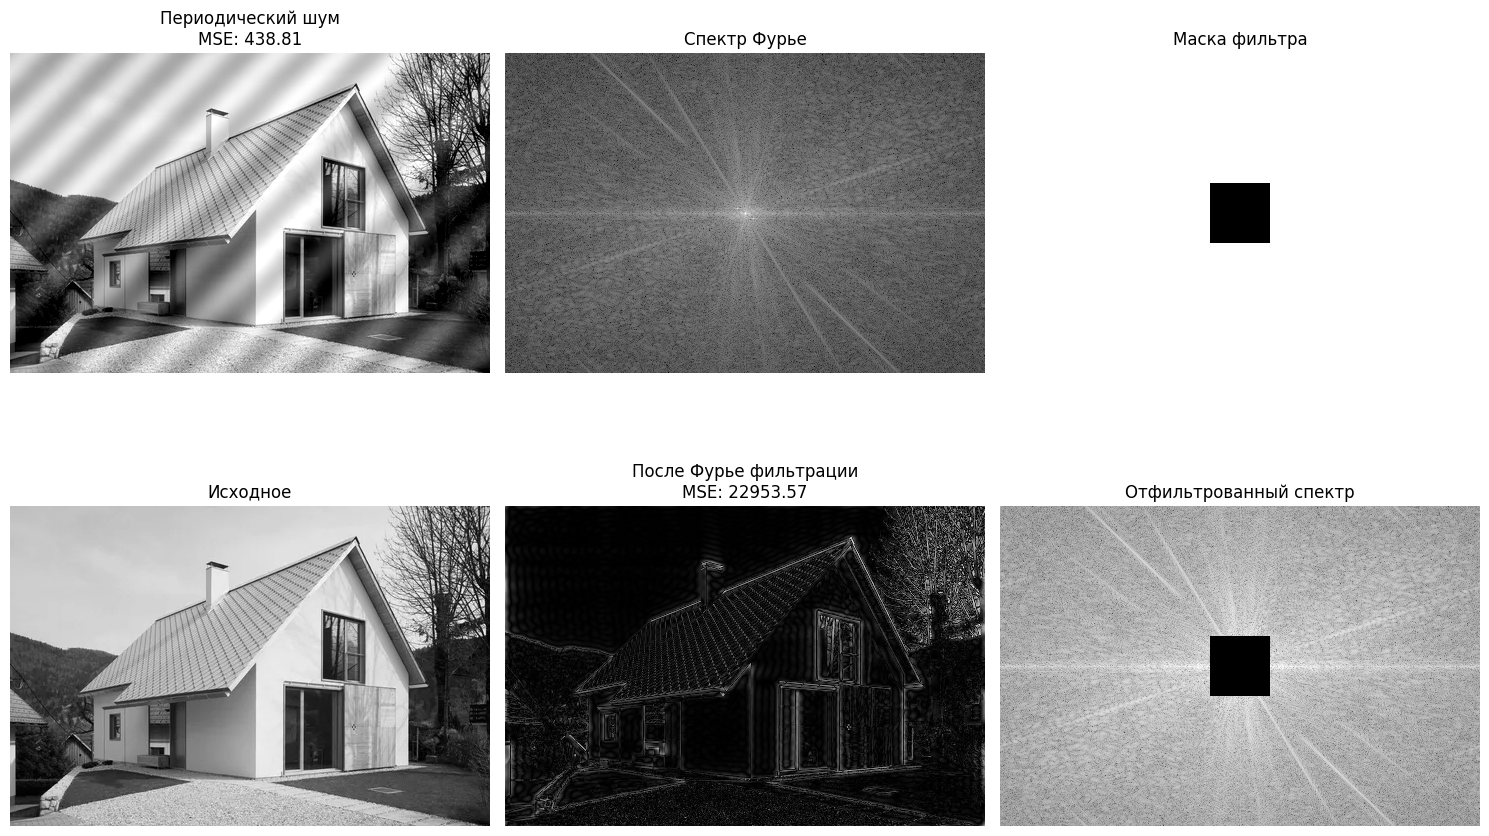

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def mse(original, filtered):
    return np.mean((original.astype(float) - filtered.astype(float)) ** 2)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

x, y = np.meshgrid(np.arange(img_gray.shape[1]), np.arange(img_gray.shape[0]))
periodic_noise = 30 * np.sin(0.1 * x + 0.1 * y)
img_periodic = np.clip(img_gray.astype(np.float32) + periodic_noise, 0, 255).astype(np.uint8)

fft = np.fft.fft2(img_periodic)
fft_shift = np.fft.fftshift(fft)

magnitude_spectrum = 20 * np.log(np.abs(fft_shift) + 1)

rows, cols = img_gray.shape
crow, ccol = rows // 2, cols // 2

mask = np.ones((rows, cols), np.uint8)
r = 30
mask[crow-r:crow+r, ccol-r:ccol+r] = 0

fft_shift_filtered = fft_shift * mask

fft_filtered = np.fft.ifftshift(fft_shift_filtered)
img_filtered = np.fft.ifft2(fft_filtered)
img_filtered = np.abs(img_filtered).astype(np.uint8)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(img_periodic, cmap='gray')
plt.title(f'Периодический шум\nMSE: {mse(img_gray, img_periodic):.2f}')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Спектр Фурье')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(mask, cmap='gray')
plt.title('Маска фильтра')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_gray, cmap='gray')
plt.title('Исходное')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_filtered, cmap='gray')
plt.title(f'После Фурье фильтрации\nMSE: {mse(img_gray, img_filtered):.2f}')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(20 * np.log(np.abs(fft_shift_filtered) + 1), cmap='gray')
plt.title('Отфильтрованный спектр')
plt.axis('off')

plt.tight_layout()
plt.show()